In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from plot_data import plot_all_catches
from utilities import get_region_border

/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Open dataframe
path = "/home/anna/msc_oppgave/fish-forecast/download_area_2011_2024_06-11_100p.csv"
df = pd.read_csv(path, sep=";")
region = get_region_border("/home/anna/msc_oppgave/fish-forecast/areas.json", "FA_JunNov_download")

In [14]:

# Read Natural Earth “countries” polygons (110 m resolution) directly from the S3 bucket
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
land = world[['geometry']]

# Build a GeoDataFrame of your catch points
gdf_pts = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['CatchLon'], df['CatchLat']),
    crs=world.crs
)

# Spatial join (R-tree accelerated): which points lie within any land polygon?
joined = gpd.sjoin(
    gdf_pts, land,
    how='left',
    predicate='within'
)

# Make two dataframes: one for points on land, one for points at sea
df_sea = (
    joined[joined['index_right'].isna()]
    .drop(columns=['geometry','index_right'])
    .reset_index(drop=True)
)
df_land = (
	joined[joined['index_right'].notna()]
	.drop(columns=['geometry', 'index_right'])
)


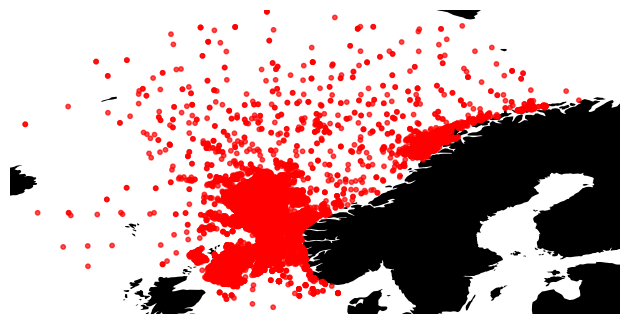

In [15]:
# Remove points on land from the original dataframe
df_filtered = df[~df.index.isin(df_land.index)]
# Save the dataframes
df_filtered.to_csv("download_area_2011_2024_06-11_100p_filtered.csv", sep=";")

# df_land.to_csv("download_area_2011_2024_06-11_100p_land.csv", sep=";")
plot_all_catches(df_filtered, region)

Number of catches on land: 398
unique days after filtering: 1470, dates lost: 58

All catches before filtering: 26255


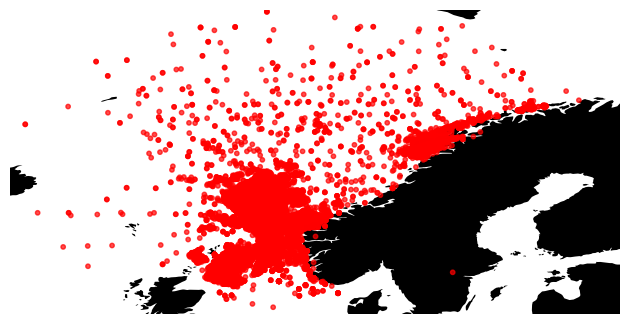

catches after filtering: 25857


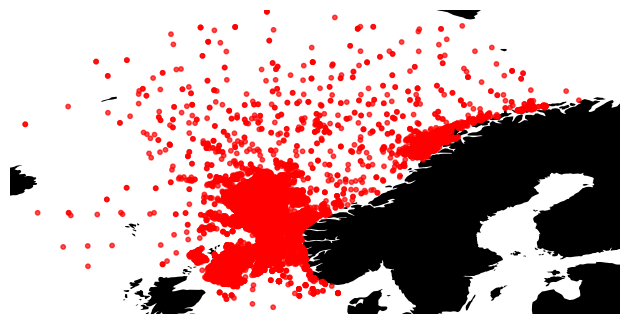

catches on land: 398


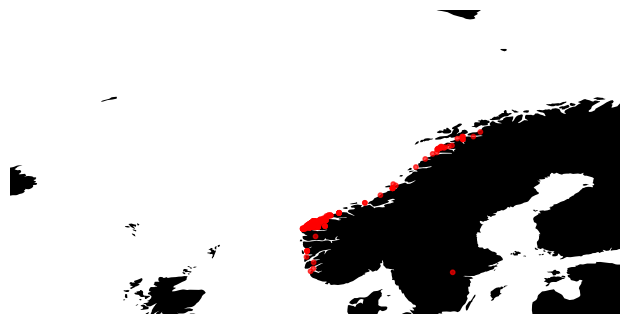

In [ ]:


print(f"Number of catches on land: {len(df) - len(df_sea)}")
print(f"unique days after filtering: {df_sea['Date'].nunique()}, dates lost: {df['Date'].nunique() - df_sea['Date'].nunique()}\n")

print(f"All catches before filtering: {len(df)}")
plot_all_catches(df, region)
print(f"catches after filtering: {len(df_sea)}")
plot_all_catches(df_sea, region)


print(f"catches on land: {len(df_land)}")
plot_all_catches(df_land, region)

Dividing region into 10x10 tiles: (2.1256332000000002 lat, 4.2621333 lon)
Tile 4, 6 has catches
  Catch at (67.283, 14.367)
  Catch at (67.183, 14.083)
  Catch at (66.828, 13.566)


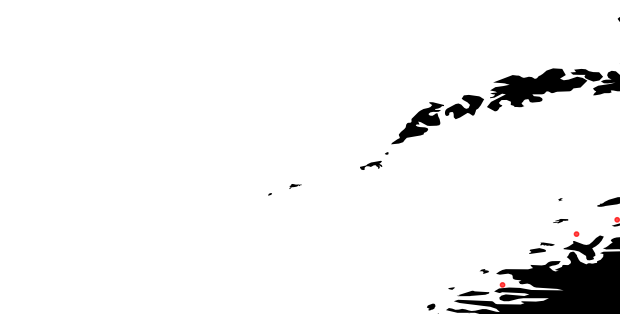

Tile 4, 7 has catches
  Catch at (67.691, 14.648)
  Catch at (67.654, 14.729)
  Catch at (67.691, 14.712)
  Catch at (67.703, 15.214)
  Catch at (67.649, 14.933)
  Catch at (67.767, 15.436)
  Catch at (68.383, 16.141)
  Catch at (68.386, 16.164)
  Catch at (68.395, 16.215)
  Catch at (67.598, 14.876)
  Catch at (68.392, 16.927)
  Catch at (67.488, 14.416)
  Catch at (67.524, 14.426)
  Catch at (67.629, 14.733)
  Catch at (67.573, 14.593)
  Catch at (67.497, 14.409)
  Catch at (67.592, 14.544)
  Catch at (67.548, 14.445)
  Catch at (67.58, 14.576)
  Catch at (68.254, 15.809)
  Catch at (67.628, 14.613)
  Catch at (68.717, 17.417)
  Catch at (68.2, 16.183)
  Catch at (68.2, 16.183)
  Catch at (68.2, 16.2)


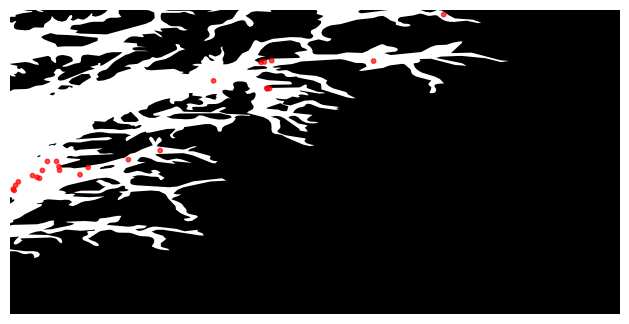

Tile 5, 6 has catches
  Catch at (65.074, 11.327)
  Catch at (64.979, 11.508)
  Catch at (66.265, 12.913)
  Catch at (64.783, 11.283)
  Catch at (64.783, 11.283)
  Catch at (64.783, 11.283)
  Catch at (64.783, 11.283)
  Catch at (64.783, 11.283)
  Catch at (64.783, 11.283)


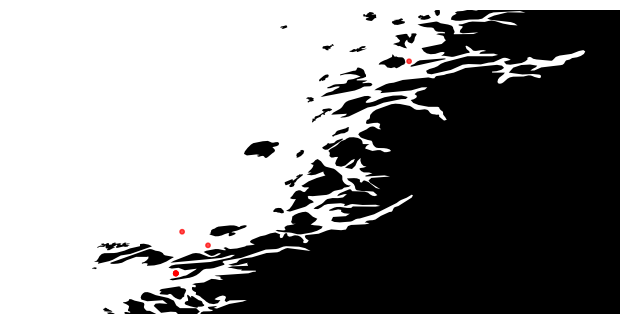

Tile 6, 4 has catches
  Catch at (62.38, 5.717)
  Catch at (62.45, 5.683)
  Catch at (62.404, 5.723)
  Catch at (62.4, 5.667)
  Catch at (62.4, 5.75)
  Catch at (62.387, 5.677)
  Catch at (62.4, 5.75)
  Catch at (62.421, 5.764)
  Catch at (62.417, 5.717)
  Catch at (62.417, 5.783)
  Catch at (62.445, 5.803)
  Catch at (62.481, 5.843)
  Catch at (62.483, 5.817)
  Catch at (62.449, 5.848)
  Catch at (62.485, 5.779)
  Catch at (62.496, 5.764)
  Catch at (62.466, 5.826)
  Catch at (62.495, 5.774)
  Catch at (62.489, 5.766)
  Catch at (62.486, 5.766)
  Catch at (62.479, 5.795)
  Catch at (62.482, 5.85)
  Catch at (62.479, 5.786)
  Catch at (62.472, 5.797)
  Catch at (62.412, 5.658)
  Catch at (62.45, 5.7)
  Catch at (62.427, 5.777)
  Catch at (62.496, 5.749)
  Catch at (62.476, 5.758)
  Catch at (62.478, 5.835)
  Catch at (62.468, 5.786)
  Catch at (62.483, 5.75)
  Catch at (62.487, 5.756)
  Catch at (62.467, 5.783)
  Catch at (62.479, 5.814)
  Catch at (62.474, 5.77)
  Catch at (62.48, 5.7

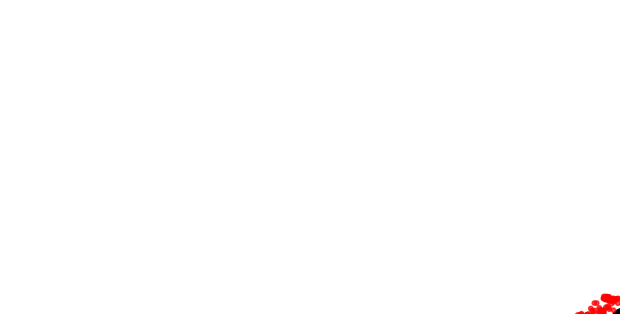

Tile 6, 5 has catches
  Catch at (62.469, 6.15)
  Catch at (62.469, 6.15)
  Catch at (62.893, 6.963)
  Catch at (62.844, 6.656)
  Catch at (62.737, 6.62)
  Catch at (62.568, 6.184)
  Catch at (62.567, 6.217)
  Catch at (62.602, 6.218)
  Catch at (62.884, 6.868)
  Catch at (62.433, 5.95)
  Catch at (62.45, 5.917)
  Catch at (62.445, 5.911)
  Catch at (62.462, 5.92)
  Catch at (62.475, 5.876)
  Catch at (62.68, 6.443)
  Catch at (62.45, 6.117)
  Catch at (62.45, 6.167)
  Catch at (62.493, 6.156)
  Catch at (63.762, 9.349)
  Catch at (63.766, 9.344)
  Catch at (62.426, 5.902)
  Catch at (62.459, 5.967)
  Catch at (62.461, 5.987)
  Catch at (62.461, 5.987)
  Catch at (62.433, 6.0)
  Catch at (62.467, 6.317)
  Catch at (62.433, 6.05)
  Catch at (62.45, 6.117)
  Catch at (62.65, 6.55)
  Catch at (62.65, 6.55)
  Catch at (62.65, 6.55)
  Catch at (62.65, 6.55)
  Catch at (62.733, 6.683)
  Catch at (62.733, 6.683)
  Catch at (62.667, 6.533)
  Catch at (62.433, 6.0)
  Catch at (62.45, 5.967)
  C

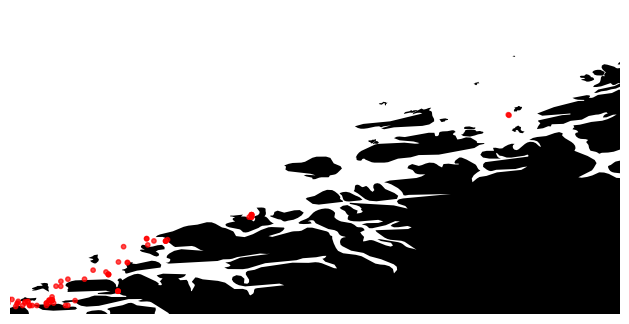

Tile 6, 6 has catches
  Catch at (64.3, 10.433)


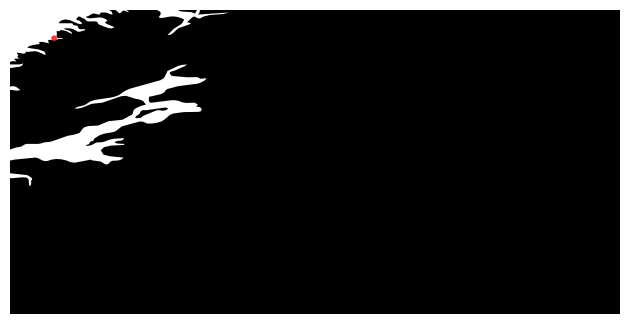

Tile 7, 4 has catches
  Catch at (62.057, 5.183)
  Catch at (62.33, 5.617)
  Catch at (62.17, 5.317)
  Catch at (62.173, 5.364)
  Catch at (62.204, 5.49)
  Catch at (62.176, 5.331)
  Catch at (62.178, 5.319)
  Catch at (62.176, 5.297)
  Catch at (62.239, 5.508)
  Catch at (62.263, 5.487)
  Catch at (62.183, 5.3)
  Catch at (62.253, 5.491)
  Catch at (62.249, 5.495)
  Catch at (62.3, 5.567)
  Catch at (61.951, 5.001)
  Catch at (62.263, 5.495)
  Catch at (62.256, 5.493)
  Catch at (62.256, 5.493)
  Catch at (62.282, 5.443)
  Catch at (62.183, 5.3)
  Catch at (62.173, 5.328)
  Catch at (62.252, 5.495)
  Catch at (62.302, 5.474)
  Catch at (62.253, 5.494)
  Catch at (62.3, 5.517)
  Catch at (62.306, 5.555)
  Catch at (62.253, 5.494)
  Catch at (62.286, 5.526)
  Catch at (62.272, 5.503)
  Catch at (62.266, 5.486)
  Catch at (62.258, 5.492)
  Catch at (62.256, 5.493)
  Catch at (62.257, 5.491)
  Catch at (62.262, 5.488)
  Catch at (62.276, 5.46)
  Catch at (62.256, 5.493)
  Catch at (62.253

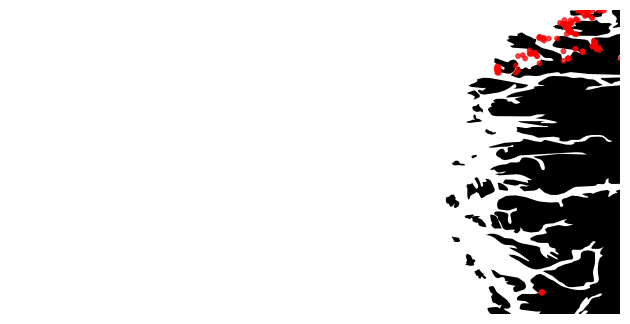

Tile 7, 5 has catches
  Catch at (62.3, 6.017)
  Catch at (62.169, 5.989)
  Catch at (62.057, 5.919)
  Catch at (61.417, 5.9)
  Catch at (62.267, 6.45)
  Catch at (62.083, 6.083)
  Catch at (62.083, 6.083)
  Catch at (62.083, 6.083)
  Catch at (62.083, 6.083)
  Catch at (62.083, 6.083)
  Catch at (62.133, 6.567)
  Catch at (62.133, 6.567)
  Catch at (62.133, 6.567)
  Catch at (62.033, 5.867)


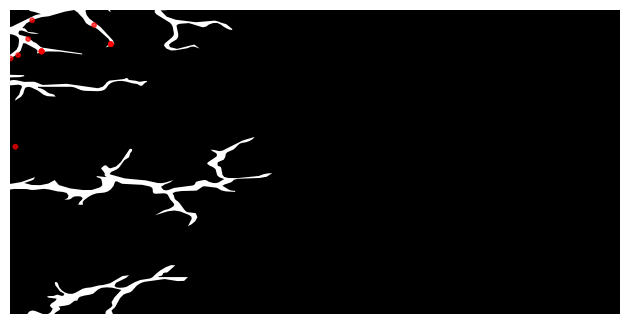

Tile 8, 4 has catches
  Catch at (59.178, 5.746)
  Catch at (59.983, 5.267)
  Catch at (59.6, 5.767)
  Catch at (58.983, 5.55)


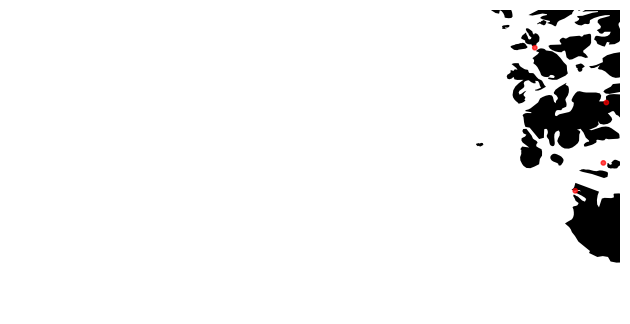

Tile 8, 7 has catches
  Catch at (58.909, 15.483)


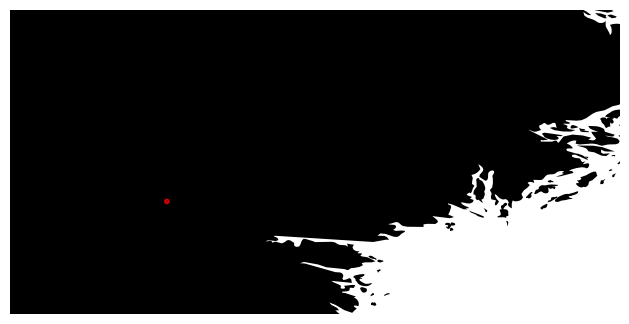

In [5]:
# Divide the region info tiles and plot each tile for verification
lat_len = region['NW']['lat'] - region['SE']['lat']
lon_len = region['SE']['lon'] - region['NW']['lon']
# print(f"Region length: {lat_len} lat, {lon_len} lon")

tiles = 10

tile_lat = lat_len / tiles
tile_lon = lon_len / tiles
print(f"Dividing region into {tiles}x{tiles} tiles: ({tile_lat} lat, {tile_lon} lon)")

check_df = df_land.copy()

for i in range(tiles):
	for j in range(tiles):
		tile = {
			'NW': {
				'lat': region['NW']['lat'] - i * tile_lat,
				'lon': region['NW']['lon'] + j * tile_lon
			},
			'SE': {
				'lat': region['NW']['lat'] - (i + 1) * tile_lat,
				'lon': region['NW']['lon'] + (j + 1) * tile_lon
			},
			'NE': {
				'lat': region['NW']['lat'] - i * tile_lat,
				'lon': region['NW']['lon'] + (j + 1) * tile_lon
			},
			'SW': {
				'lat': region['NW']['lat'] - (i + 1) * tile_lat,
				'lon': region['NW']['lon'] + j * tile_lon
			}
		}
		# print(f"Tile {i}, {j}: {tile}")
		# Only plot if the tile has catch
		if not check_df[
			(check_df['CatchLat'] <= tile['NW']['lat']) &
			(check_df['CatchLat'] >= tile['SE']['lat']) &
			(check_df['CatchLon'] >= tile['NW']['lon']) &
			(check_df['CatchLon'] <= tile['SE']['lon'])
		].empty:
			print(f"Tile {i}, {j} has catches")
			# Print each catch location in the tile
			for idx, row in check_df.iterrows():
				if (row['CatchLat'] <= tile['NW']['lat'] and
					row['CatchLat'] >= tile['SE']['lat'] and
					row['CatchLon'] >= tile['NW']['lon'] and
					row['CatchLon'] <= tile['SE']['lon']):
					print(f"  Catch at ({row['CatchLat']}, {row['CatchLon']})")
			plot_all_catches(check_df, tile, use_catch_weight=False)